In [14]:
import numpy as np

# 感知机
- 感知机接受多个信号，输出一个信号；感知机的信号只有 1（“传递信号”） 和 0（“不传递信号 ”） 两种取值
- 权重是控制输入信号的重要性的参数，偏置是调整神经元被激活的容易程度的参数
- 信号乘以权重并加上偏置，其值超过阈值(`linear threshold unit (LTU)`
)，神经元即激活:    
    - $z=w_1x_1+w_2x_2+...w_nx_n=W^T\cdot X$   
    - $h_w(X)=step(z)$
    
$$step(z)=\begin{cases}0\quad &if\ z<0\\1\quad &if\ z\geq0\end{cases}\qquad or\qquad sgn(z)=\begin{cases}-1\quad &if\ z<0\\0\quad &if\ z=0\\+1\quad &if\ z>0\end{cases}$$
    
    

In [15]:
# 与门
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1 * x1 + w2 * x2
    return 0 if tmp <= theta else 1


AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

In [16]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    temp = np.sum(w * x) + b
    return 0 if temp <= 0 else 1

In [17]:
# 非门
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    return 0 if tmp <= 0 else 1


NAND(0, 1)

1

In [18]:
# 或门
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    return 0 if tmp <= 0 else 1


OR(0, 1)

1

- 单层感知机只能表示线性空间，因此无法表示异或门(XOR)
- 二层感知机，激活函数为非线性的`sigmoid` 函数时，可以表示任意函数

In [19]:
# 多层感知机 表示 XOR：
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


XOR(0, 0), XOR(0, 1), XOR(1, 1), XOR(1, 0)

(0, 1, 0, 1)

# 神经网络
- 神经网络的一个重要性质就是自动的从数据中学习到合适的权重参数；
- 权重用于控制各个信号的重要性，偏置表示神经元被激活的容易程度。

## ***激活函数***

In [20]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [21]:
# 阶跃函数
def step_function(x):
    y = x > 0
    return y.astype(np.int)
#     return np.array(x>0, type=np.int)

In [32]:
# sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [23]:
# ReLU（Rectified Linear Unit） 函数
def relu(x):
    return np.maximum(0, x)

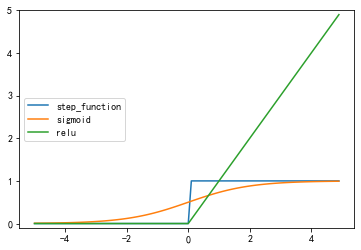

In [24]:
x = np.arange(-5.0, 5.0, 0.1)

fig, ax = plt.subplots()
for func in [step_function, sigmoid, relu]:
    y = func(x)
    ax.plot(x, y, label=func.__name__)
    ax.set_ylim([min(y) - 0.1, max(y) + 0.1])
ax.legend(loc="center left")

In [25]:
x = np.random.randn(5, 4)
x

array([[-0.88175789, -1.37942033,  0.07669233,  1.59580791],
       [-0.69581179,  0.50923301,  1.59635868, -0.63803481],
       [-1.31170516, -0.8287045 ,  0.46636644,  2.00029271],
       [ 0.48414047, -0.02164478,  0.33609554, -1.32446495],
       [ 1.0547773 , -0.06546479,  1.20240108,  1.34639088]])

In [26]:
relu(x)

array([[0.        , 0.        , 0.07669233, 1.59580791],
       [0.        , 0.50923301, 1.59635868, 0.        ],
       [0.        , 0.        , 0.46636644, 2.00029271],
       [0.48414047, 0.        , 0.33609554, 0.        ],
       [1.0547773 , 0.        , 1.20240108, 1.34639088]])

In [27]:
def sigmoid(z):
    A = 1 / (1 + np.exp(-z))
    return (A, z)


def tanh(z):
    A = np.tanh(z)
    return (A, z)


def relu(z):
    A = np.maximum(0, z)
    return (A, z)


def leaky_relu(z):
    A = np.maximum(0.1 * z, z)
    return (A, z)

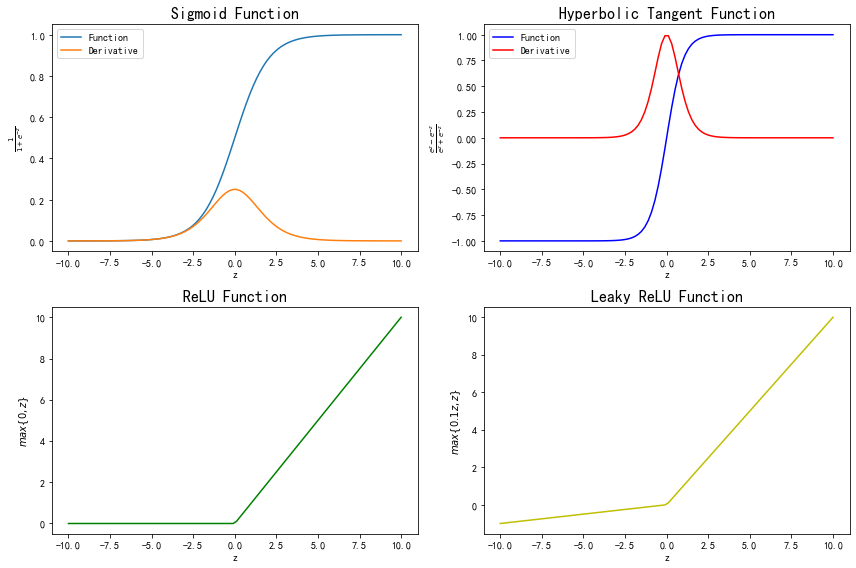

In [28]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
A_sigmoid, z = sigmoid(z)
A_tanh, z = tanh(z)
A_relu, z = relu(z)
A_leaky_relu, z = leaky_relu(z)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(z, A_sigmoid, label='Function')
plt.plot(z, A_sigmoid * (1 - A_sigmoid), label='Derivative')
plt.legend(loc='upper left')
plt.xlabel('z')
plt.ylabel(r'$\frac{1}{1+e^{-z}}$')
plt.title('Sigmoid Function', fontsize=16)

plt.subplot(2, 2, 2)
plt.plot(z, A_tanh, 'b', label="Function")
plt.plot(z, 1 - np.square(A_tanh), 'r', label="Derivative")
plt.legend(loc="upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$")
plt.title("Hyperbolic Tangent Function", fontsize=16)

plt.subplot(2, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize=16)

plt.subplot(2, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize=16)
plt.tight_layout()
plt.show();

- `sigmoid` 函数是平滑的曲线，阶跃函数则以 0 为界，发生急剧变化
- 感知机中流动的是 0 或 1 的二元信号，神经网络中流动的则是连续的实值信号
- 输入值越大，输入信号为重要信息时，两者都会输出较大值

## ***输出层的设计***

- 回归问题用恒等函数  

In [29]:
def identity_function(x):
    return x

- 分类问题用 softmax 函数
$$y_k=\frac{exp(a_k)}{\sum_{i=1}^n exp(a_{i})}$$

In [30]:
def softmax(x):
    if x.ndim == 2:
        x = x.T  # 转置是因为数组的广播规则
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)  # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

In [36]:
x = np.array([0.8,0.02,0.4])
sigmoid(x), softmax(x)

(array([0.68997448, 0.50499983, 0.59868766]),
 array([0.46976453, 0.21534289, 0.31489258]))

## ***简单的三层神经网络***

In [19]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [20]:
# 神经网络的推理处理，即前向传播(forward propagation)
def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [21]:
network = init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]


## ***手写字识别***

导入数据集，确认数据

In [22]:
import os, sys
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import pickle

In [23]:
(x_train, t_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [24]:
print(x_train.shape,t_train.shape, x_test.shape)

(60000, 784) (60000,) (10000, 784)


In [25]:
from PIL import Image

In [26]:
def img_show(img):
    pil_image = Image.fromarray(np.uint8(img))
    pil_image.show()

In [27]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [28]:
img = img.reshape(28, 28)
img_show(img)

神经网络

In [29]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, 
                                                      normalize=True,
                                                     one_hot_label=False)
    return x_test, t_test

In [30]:
def init_network():
    with open('dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [31]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [32]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [33]:
x.shape

(10000, 784)

In [34]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [35]:
W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

批处理

In [36]:
%time
batchsize = 100
accuracy_cnt = 0

for i in range(0, len(x), batchsize):
    x_batch = x[i:i + batchsize]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i + batchsize])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Wall time: 0 ns
Accuracy:0.9352


# 神经网络的学习

## 损失函数
损失函数，分类问题，t 为目标的独热向量， y 为预测的概率分布
   - 均方误差
   - 交叉熵误差

In [37]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [38]:
def cross_entropy_error(y, t):
    """
    y: 预测得到的每个类别的概率
    t: 目标的独热向量
    """
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [39]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

In [40]:
cross_entropy_error(y, t), mean_squared_error(y, t)

(0.510825457099338, 0.09750000000000003)

## `mini-batch`学习
   - 从训练数据中选择一批数据作为全部数据的近似，对每个 mini-batch 进行学习

In [41]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [42]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = t.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- t 为目标类别，而不是独热向量时

In [43]:
def cross_entropy_error(y, t):
    """
    y: 每一行预测得到的每个类别的概率
    t: 每一行为目标的独热向量，将其转换为类别标签的索引
    """
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数值微分求得梯度

In [44]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 还原值
        it.iternext()

    return grad

## 梯度下降法

In [45]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [47]:
def function_2(x):
    return x[0]**2 + x[1]**2


init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, step_num=1000)

array([-5.04890207e-09,  6.73186943e-09])

## 神经网络的梯度

In [48]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.29011245  0.15633975 -0.44645221]
 [ 0.43516868  0.23450963 -0.66967831]]


## 神经网络学习算法的实现

In [49]:
class TwoLayerNet:
    def __init__(self,
                 input_size,
                 hidden_size,
                 output_size,
                 weight_init_std=0.01):
        self.params = {}

        self.params['W1'] = weight_init_std * np.random.randn(
            input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(
            hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)

        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [50]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape, net.params['b1'].shape, net.params[
    'W2'].shape, net.params['b2'].shape,

((784, 100), (100,), (100, 10), (10,))

In [51]:
x = np.random.rand(100, 784)
y = net.predict(x)

## `mini-batch`的实现

In [ ]:
%time
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=True,
                                                  one_hot_label=False)
train_loss_list = []

train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size // batch_size, 1)

# 超参数
iter_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grads[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train acc, Test acc | {}, {}".format(train_acc, test_acc))

Wall time: 0 ns


In [ ]:
x = np.arange(len(loss))

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8])
ax.plot(x, loss, linewidth=2)
ax.set_xlabel('$epoch$', fontsize=18)
ax.set_ylabel('$loss$', fontsize=18)

x0, x1 = 0, 400
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42])
x = np.arange(400)
ax.plot(x, loss[:400], linewidth=2)
ax.set_xlabel('$epoch$', fontsize=14)
ax.set_ylabel('$loss$', fontsize=14)

## 评价模型性能